In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False

model1 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(10, activation='softmax')
])

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 21s 17ms/step - loss: 2.3243 - accuracy: 0.0997 - val_loss: 2.3168 - val_accuracy: 0.0977
Epoch 2/5
625/625 [==============================] - 7s 11ms/step - loss: 2.3229 - accuracy: 0.1023 - val_loss: 2.3272 - val_accuracy: 0.1016
Epoch 3/5
625/625 [==============================] - 6s 10ms/step - loss: 2.3193 - accuracy: 0.1053 - val_loss: 2.3442 - val_accuracy: 0.1014
Epoch 4/5
625/625 [==============================] - 7s 11ms/step - loss: 2.3212 - accuracy: 0.1055 - val_loss: 2.3014 - val_accuracy: 0.1024
Epoch 5/5
625/625 [==============================] - 18s 29ms/step - loss: 2.3204 - accuracy: 0.1028 - val_loss: 2.3324 - val_accuracy: 0.0952


In [ ]:
base_model.trainable = True
model2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 65s 48ms/step - loss: 1.4102 - accuracy: 0.5068 - val_loss: 2.5916 - val_accuracy: 0.1306
Epoch 2/5
625/625 [==============================] - 27s 43ms/step - loss: 0.9111 - accuracy: 0.6868 - val_loss: 3.4862 - val_accuracy: 0.1173
Epoch 3/5
625/625 [==============================] - 40s 64ms/step - loss: 0.7387 - accuracy: 0.7487 - val_loss: 3.3066 - val_accuracy: 0.1900
Epoch 4/5
625/625 [==============================] - 25s 41ms/step - loss: 0.6377 - accuracy: 0.7812 - val_loss: 3.3389 - val_accuracy: 0.1626
Epoch 5/5
625/625 [==============================] - 28s 45ms/step - loss: 0.5536 - accuracy: 0.8087 - val_loss: 4.1109 - val_accuracy: 0.0995


In [ ]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes, average='macro')
    recall = recall_score(y_test, y_pred_classes, average='macro')
    f1 = f1_score(y_test, y_pred_classes, average='macro')
    return accuracy, precision, recall, f1

accuracy_tl, precision_tl, recall_tl, f1_tl = evaluate_model(model1, x_test, y_test)
accuracy_ft, precision_ft, recall_ft, f1_ft = evaluate_model(model2, x_test, y_test)


313/313 [==============================] - 5s 9ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


313/313 [==============================] - 5s 11ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Transfer Learning Model Metrics:")
print("Accuracy:", accuracy_tl)
print("Precision:", precision_tl)
print("Recall:", recall_tl)
print("F1-score:", f1_tl)
print()
print("Fine-tuned Model Metrics:")
print("Accuracy:", accuracy_ft)
print("Precision:", precision_ft)
print("Recall:", recall_ft)
print("F1-score:", f1_ft)

Transfer Learning Model Metrics:
Accuracy: 0.1024
Precision: 0.042507229793152496
Recall: 0.1024
F1-score: 0.044701108885242105

Fine-tuned Model Metrics:
Accuracy: 0.0989
Precision: 0.01963950144380496
Recall: 0.0989
F1-score: 0.031105302585690487


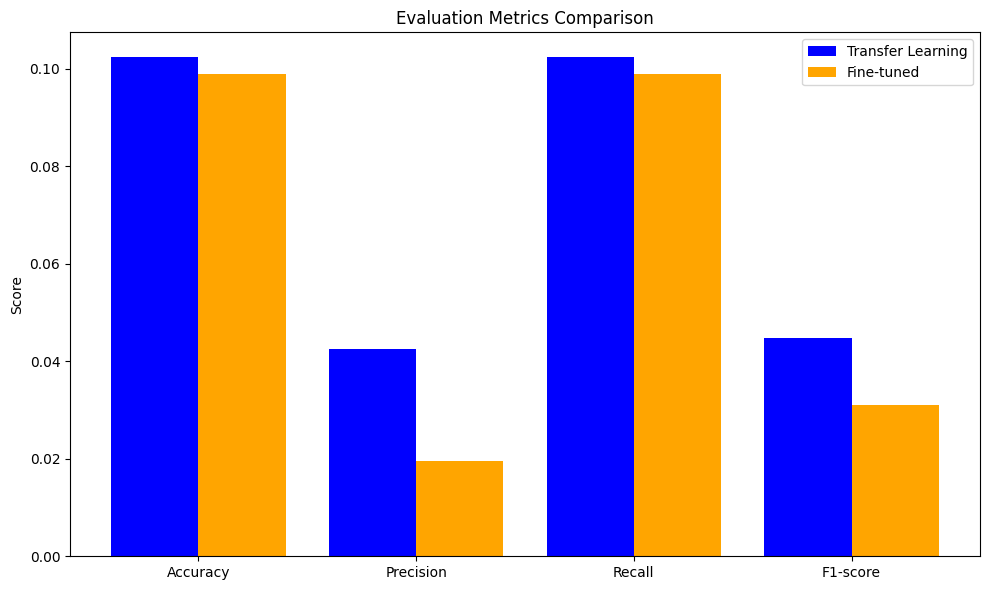

In [ ]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
transfer_learning_metrics = [accuracy_tl, precision_tl, recall_tl, f1_tl]
fine_tuned_metrics = [accuracy_ft, precision_ft, recall_ft, f1_ft]

plt.figure(figsize=(10, 6))

plt.bar(np.arange(len(metrics)) - 0.2, transfer_learning_metrics, width=0.4, label='Transfer Learning', color='blue')

plt.bar(np.arange(len(metrics)) + 0.2, fine_tuned_metrics, width=0.4, label='Fine-tuned', color='orange')

plt.xticks(np.arange(len(metrics)), metrics)

plt.ylabel('Score')

plt.title('Evaluation Metrics Comparison')
plt.legend()
plt.tight_layout()
plt.show()


Data Preprocessing: The CIFAR-10 dataset, consisting of 60,000 32x32 color images in 10 classes, is loaded and preprocessed. The pixel values are scaled to the range [0, 1].

Transfer Learning with EfficientNetB0: The EfficientNetB0 model pre-trained on ImageNet is employed for transfer learning. The pre-trained weights of the base model are frozen, and a new classification head is added on top. The model is compiled with the Adam optimizer and trained on the CIFAR-10 training data for 5 epochs.

Fine-tuning: The base EfficientNetB0 model is unfrozen, and the entire model is trained end-to-end on the CIFAR-10 dataset to perform fine-tuning. Again, the model is trained for 5 epochs with the Adam optimizer.

Evaluation Metrics: The accuracy, precision, recall, and F1-score are calculated for both the transfer learning model and the fine-tuned model using the test data.

Visualization: Matplotlib is used to plot a bar graph comparing the evaluation metrics of the transfer learning model and the fine-tuned model. Each evaluation metric (accuracy, precision, recall, and F1-score) is represented by a bar, with one set of bars for the transfer learning model and another set for the fine-tuned model. This visualization allows for a quick comparison of the performance of the two models across different metrics.